# BAKERY SALES ANALYSIS

In [137]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Loading and Cleaning Data

In [138]:
#reading data from csv file
data = pd.read_csv('Bakery.csv')
data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


check if there are null values

In [139]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

break down the date time into years, months, weekday and hours

In [140]:
data["Year"]=pd.to_datetime(data["DateTime"]).dt.year
data["Month"]=pd.to_datetime(data["DateTime"]).dt.month
data["Week_Day"]=pd.to_datetime(data["DateTime"]).dt.weekday
data["Hour"]=pd.to_datetime(data["DateTime"]).dt.hour


#label days of the week
data["Week_Day"]=data["Week_Day"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))

## 2. EDA

### Monthly Sales

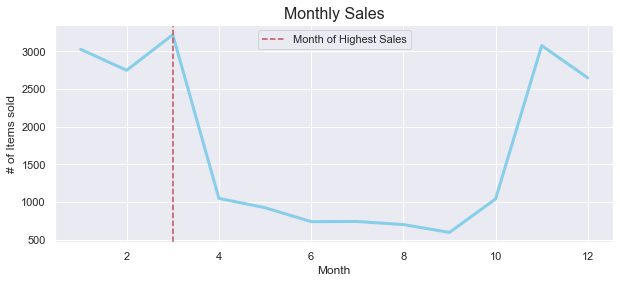

In [148]:
monthly_sales = data.groupby(data['Month'],as_index=False)['Items'].count()

sns.set(style='darkgrid')
plt.figure(figsize=(10,4))
sns.lineplot(data= monthly_sales, x='Month', y='Items',color='skyblue', linewidth=3)
plt.axvline(x = 3, color = 'r', linestyle = '--', label = 'Month of Highest Sales')

plt.legend()
plt.title('Monthly Sales', size = 16)
plt.xlabel('Month')
plt.ylabel('# of Items sold')
plt.show()

Top 5 Items in March

In [142]:
# march_sales=data.pivot_table(index='Month', columns='Items',aggfunc ='sum')
march_sales=data.loc[data['Month'].isin([3])]
march_sales['Items'].value_counts()[:5]

Coffee      873
Bread       481
Tea         197
Cake        182
Sandwich    155
Name: Items, dtype: int64

### Analysis

- March has the most sales and generally more sales in the winter months
- Coffee is the most sold item in March


### Sales by Time of the Day

In [144]:
tod = data.groupby('Week_Day')['Items'].count().sort_values(ascending=False)
tod

Week_Day
Saturday     3554
Friday       3266
Sunday       3118
Monday       3035
Tuesday      2645
Thursday     2601
Wednesday    2288
Name: Items, dtype: int64

In [145]:
sales=data.pivot_table(index='Daypart', columns='Week_Day', values='Items', aggfunc ='count')
sales=sales.fillna(0)
sales

Week_Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Daypart,,,,,,,
Afternoon,1745.0,1787.0,1931.0,1824.0,1447.0,1557.0,1278.0
Evening,91.0,50.0,50.0,106.0,101.0,73.0,49.0
Morning,1422.0,1198.0,1571.0,1188.0,1051.0,1013.0,961.0
Night,8.0,0.0,2.0,0.0,2.0,2.0,0.0


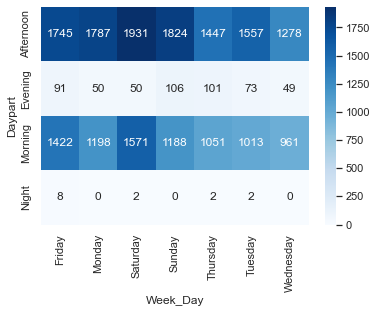

In [ ]:
sales_heatmap = sns.heatmap(sales, annot = True, cmap = 'Blues', fmt=".0f")

### Analysis

- Weekends are the busiest 
- Saturday Afternoons is the peak hour of the week
- Most sales in the Mornings and Afternoons

## 3. Train Data Model

## Preprocessing

In [134]:
def preprocess_inputs(data):
    data = data.copy()
    
    #Drop Year, Month, Hour
    data = data.drop(['Year','Month','Hour', 'Daypart', 'DayType'], axis=1)
    return data
# data2=data.groupby(data['DateTime'],as_index=False).pivot
# data2=data2.fillna(0)
# data2

In [135]:
preprocess_inputs(data)

,TransactionNo,Items,DateTime,Week_Day
0,1,Bread,2016-10-30 09:58:11,Sunday
1,2,Scandinavian,2016-10-30 10:05:34,Sunday
2,2,Scandinavian,2016-10-30 10:05:34,Sunday
3,3,Hot chocolate,2016-10-30 10:07:57,Sunday
4,3,Jam,2016-10-30 10:07:57,Sunday
...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Monday
20503,9682,Tea,2017-09-04 14:32:58,Monday
20504,9683,Coffee,2017-09-04 14:57:06,Monday
20505,9683,Pastry,2017-09-04 14:57:06,Monday


In [ ]:
Ongoing